In [1]:
import sys
import numpy as np
from apply_ltspice_filter import apply_ltspice_filter, get_impulse_response
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#if installed in a non-standard directory
ltspice_command = "wine /LTspiceXVII/XVIIx64.exe -Run -b"


circuit_file = "spice/circuit.asc"


Found Numpy. WIll be used for storing data


In [2]:
def func(x, a, b, c, d):
    
    x_ = x-d
    return (x>d)*a/(b-c)*(np.exp(-x_/b)-np.exp(-x_/c))


p0  =    [-5e-8,1e-9 ,70e-9,10e-9]
param_bounds=(
         [1e-20     ,0.1e-9     ,10e-9  , 1e-9    ],
         [1e-11 ,10e-9,500e-9,20e-9])

In [3]:
def analysis(r_rise,r_tail):

## time range

  sample_width=500e-9
  delta_t=0.1e-9
  samples = int(sample_width/delta_t)

  time = np.linspace(0,sample_width,samples)
  configuration_1 = {
    "r_rise":r_rise,
    "r_tail":r_tail
  }

  dummy, filter_sr = apply_ltspice_filter(
      circuit_file,
      time,
      time, ## we don't care about input data
      params=configuration_1,
      ltspice_command = ltspice_command
      )

  #plt.plot(time,filter_sr,"r",label="filter step response")
  #plt.legend()
  #plt.grid(True)
  #plt.show()

  popt, pcov = curve_fit(func, time, filter_sr, p0 = p0)#, bounds=param_bounds)
  plt.plot(time,filter_sr, label="original signal")
  plt.plot(time, func(time, *popt), 'r-',
         label='fit: a=%5.3e, b=%5.3e, c=%5.3e, d=%5.3e' % tuple(popt))

  plt.show()

  print('fit: a=%5.3e, b=%5.3e, c=%5.3e, d=%5.3e' % tuple(popt))
    
  return popt


sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


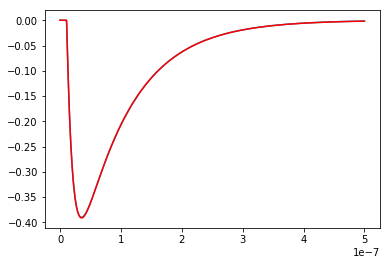

fit: a=-4.407e-08, b=1.028e-08, c=8.404e-08, d=1.082e-08
[ -4.40694600e-08   1.02751393e-08   8.40415153e-08   1.08227415e-08]


In [4]:
print(analysis(1000,1000))

sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


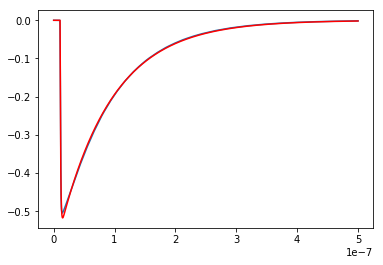

fit: a=-4.678e-08, b=9.051e-10, c=8.610e-08, d=1.054e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


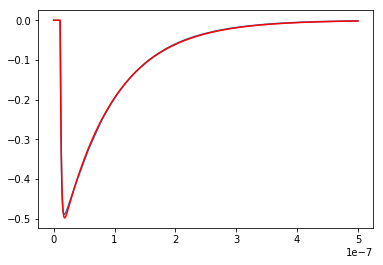

fit: a=-4.650e-08, b=1.883e-09, c=8.562e-08, d=1.068e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


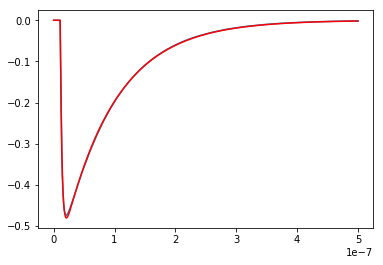

fit: a=-4.617e-08, b=2.920e-09, c=8.529e-08, d=1.074e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


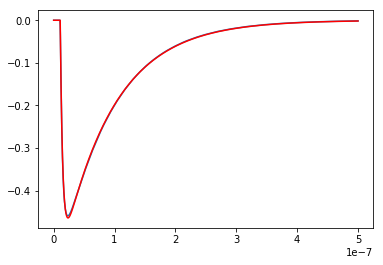

fit: a=-4.586e-08, b=3.996e-09, c=8.501e-08, d=1.076e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


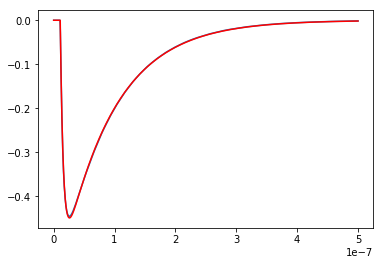

fit: a=-4.556e-08, b=5.073e-09, c=8.478e-08, d=1.077e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


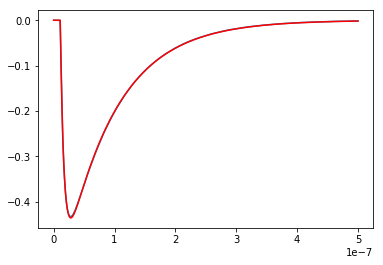

fit: a=-4.526e-08, b=6.142e-09, c=8.458e-08, d=1.078e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


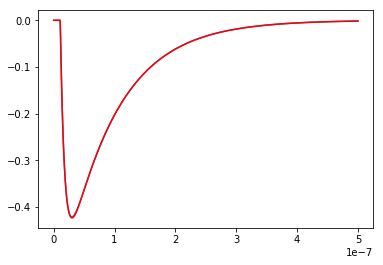

fit: a=-4.495e-08, b=7.199e-09, c=8.441e-08, d=1.079e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


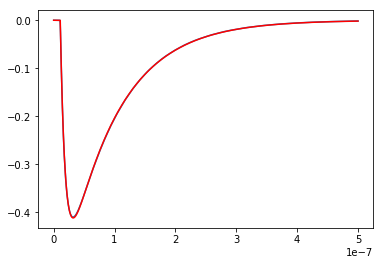

fit: a=-4.466e-08, b=8.240e-09, c=8.427e-08, d=1.080e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


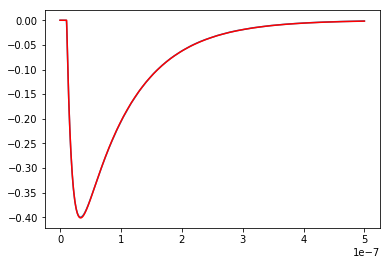

fit: a=-4.436e-08, b=9.258e-09, c=8.415e-08, d=1.082e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


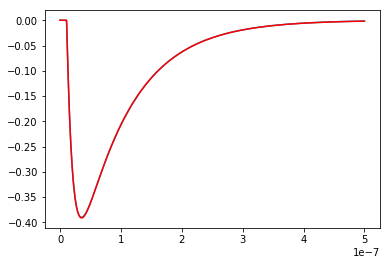

fit: a=-4.407e-08, b=1.028e-08, c=8.404e-08, d=1.082e-08


In [5]:
results = []
r_rise_list = []

for r_rise in np.linspace(1,1000,10):
  r_rise_list += [r_rise]
  results     += [analysis(r_rise,1000)]

results = np.array(results)

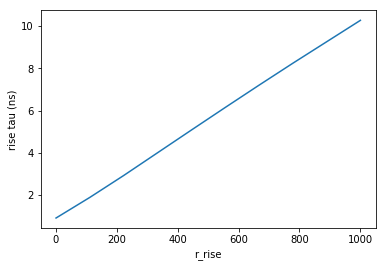

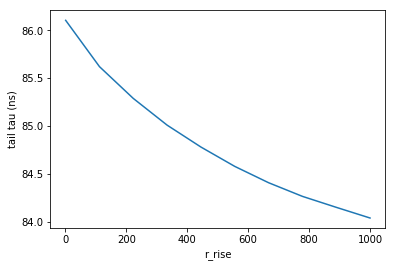

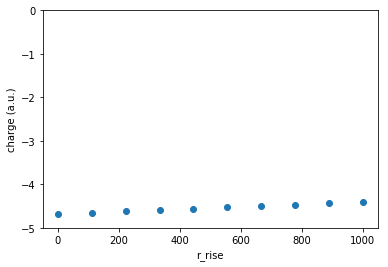

In [10]:
plt.plot(r_rise_list,results[:,1]*1e9)
plt.xlabel("r_rise")
plt.ylabel("rise tau (ns)")
plt.show()

plt.plot(r_rise_list,results[:,2]*1e9)
plt.xlabel("r_rise")
plt.ylabel("tail tau (ns)")
plt.show()

plt.scatter(r_rise_list,results[:,0]*1e8)
plt.xlabel("r_rise")
plt.ylabel("charge (a.u.)")
plt.ylim(-5,0)
plt.show()

sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


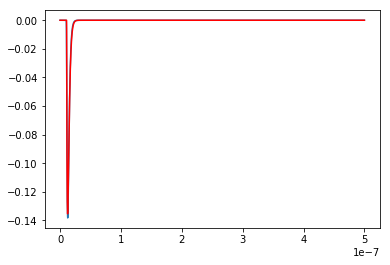

fit: a=-6.140e-10, b=1.667e-09, c=1.667e-09, d=1.077e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


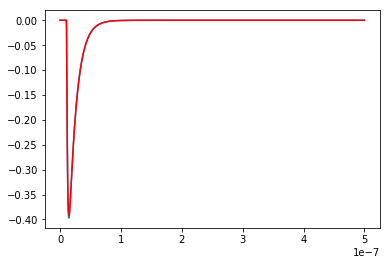

fit: a=-6.587e-09, b=1.681e-09, c=1.225e-08, d=1.075e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


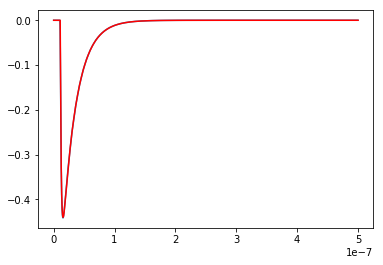

fit: a=-1.233e-08, b=1.685e-09, c=2.274e-08, d=1.074e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


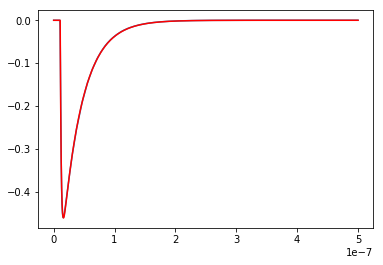

fit: a=-1.783e-08, b=1.731e-09, c=3.280e-08, d=1.070e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


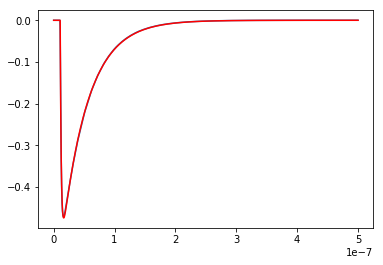

fit: a=-2.311e-08, b=1.740e-09, c=4.250e-08, d=1.069e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


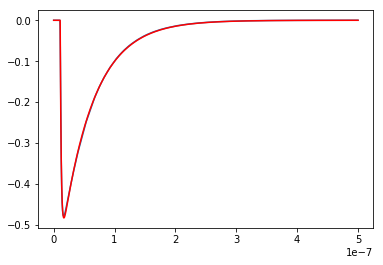

fit: a=-2.816e-08, b=1.748e-09, c=5.181e-08, d=1.068e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


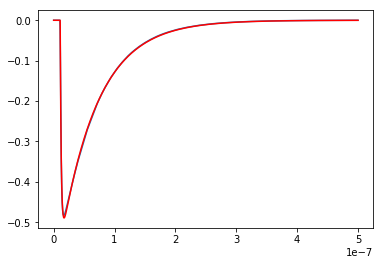

fit: a=-3.303e-08, b=1.756e-09, c=6.077e-08, d=1.068e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


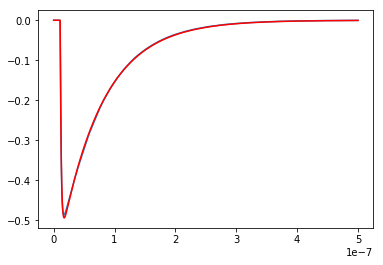

fit: a=-3.771e-08, b=1.761e-09, c=6.939e-08, d=1.068e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


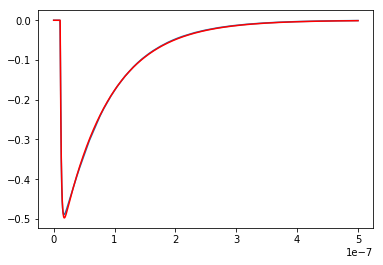

fit: a=-4.219e-08, b=1.763e-09, c=7.768e-08, d=1.068e-08
sig_in.csv has not changed
trancmd.txt has not changed
circuit.asc is older than circuit.raw
Normal access


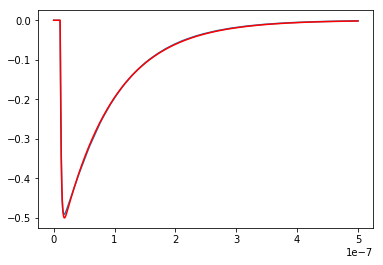

fit: a=-4.652e-08, b=1.766e-09, c=8.568e-08, d=1.067e-08


In [7]:
results2 = []
r_tail_list = []

for r_tail in np.linspace(1,1000,10):
  r_tail_list += [r_tail]
  results2     += [analysis(100,r_tail)]

results2 = np.array(results2)

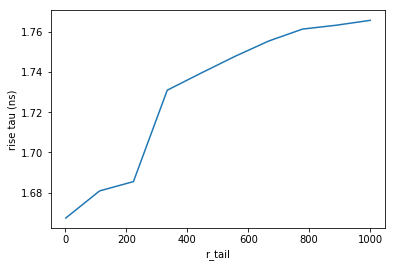

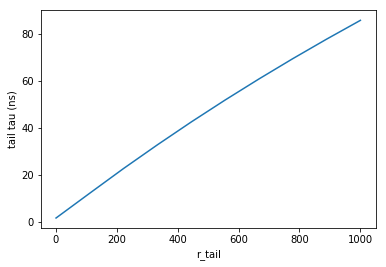

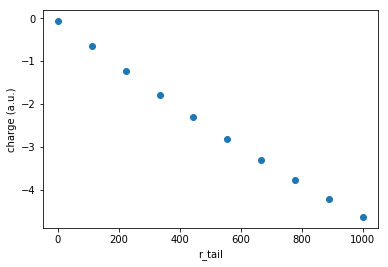

In [8]:
plt.plot(r_tail_list,results2[:,1]*1e9)
plt.xlabel("r_tail")
plt.ylabel("rise tau (ns)")
plt.show()

plt.plot(r_tail_list,results2[:,2]*1e9)
plt.xlabel("r_tail")
plt.ylabel("tail tau (ns)")
plt.show()

plt.scatter(r_tail_list,results2[:,0]*1e8)
plt.xlabel("r_tail")
plt.ylabel("charge (a.u.)")
plt.show()